# NumPy: Arreglos numéricos para Python

NumPy es el módulo básico para la computación científica y la ciencia de datos en Python. Su objeto más usado son los arreglos multidimensionales, los cuales tienen las siguientes características:

* Los arreglos tienen cualquier número de dimensiones.
* Todos los elementos de un arreglo tienen el mismo tipo de datos.
* Los elementos de un arreglo son usualmente tipos de datos nativos (e.g. enteros, cadenas, etc).
* La memoria de un arreglo es un bloque contiguo que puede ser fácilmente pasado a otras librerías numéricas (BLAS, LAPACK, etc.).
* La mayoría de NumPy está implementado en C, por lo que es bastante rápido.

Esta es la forma canónica en que se importa Numpy y se crea un arreglo

In [1]:
import numpy as np

In [2]:
data = [0.,2,4,6]
a = np.array(data)

In [3]:
a

array([ 0.,  2.,  4.,  6.])

La forma de un arreglo:

In [4]:
a.shape

(4,)

El número de dimensiones del arreglo:

In [5]:
a.ndim

1

El número de elementos del arreglo:

In [6]:
a.size

4

El número de bytes que ocupa el arreglo:

In [7]:
a.nbytes

32

El atributo `dtype` describe el "tipo de datos" (data type) de los elementos:

In [8]:
a.dtype

dtype('float64')

## Creando arreglos

Los arreglos pueden ser creaados con listas or tuplas anidadas:

In [9]:
data = [[0.0, 2.0, 4.0, 6.0], [1.0, 3.0, 5.0, 7.0]]
b = np.array(data)

In [10]:
b

array([[ 0.,  2.,  4.,  6.],
       [ 1.,  3.,  5.,  7.]])

In [11]:
b.shape, b.ndim, b.size, b.nbytes

((2, 4), 2, 8, 64)

La función `arange` es similar a la función `range` de Python, pero crea un arreglo, no un iterador:

In [12]:
c = np.arange(0.0, 10.0, 1.0) # paso entre valores de 1.0
c

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

La función `linspace` es similar, pero permite especificar el número de puntos:

In [13]:
e = np.linspace(0.0, 5.0, 11) # 11 points
e

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

También hay funciones `zeros` y `ones`:

In [14]:
np.zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [15]:
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

## dtype

Los arreglos tienen un atributo `dtype` que guarda el tipo de datos de cada elemento. Puede ser definido:

* Implicitamente por el tipo de elemento
* Al pasarle el argumento `dtype` a una función de creación de arreglos

Este es un arreglo de tipo entero:

In [16]:
a = np.array([0, 1, 2, 3])

In [17]:
a, a.dtype

(array([0, 1, 2, 3]), dtype('int64'))

Todas las funciones de creación de arreglos aceptan un argumento opcional `dtype` para cambiar el tipo de los datos del arreglo:

In [18]:
c = np.arange(0, 10, 2, dtype=np.float)
c

array([ 0.,  2.,  4.,  6.,  8.])

También es posible usar el método `astype` para crear una copia del arreglo con un `dtype` dado:

In [19]:
d = c.astype(dtype=np.int)
d

array([0, 2, 4, 6, 8])

La documentación de NumPy sobre [dtypes](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html) (en inglés) describe todas las formas que existen para especificar dtypes.

## Operaciones sobre arreglos

Las operaciones matemáticas básicas son **elemento a elemento** para:

* Números y arreglos
* Arreglos y arreglos

Por ejemplo, a continuacuón creamos un arreglo vacío y lo llenamos con un valor

In [20]:
a = np.empty((3,3))
a.fill(0.1)
a

array([[ 0.1,  0.1,  0.1],
       [ 0.1,  0.1,  0.1],
       [ 0.1,  0.1,  0.1]])

In [21]:
c = np.ones((3,3))
c

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

La multiplicacion por escalar es elemento a elemento:

In [22]:
b = 2 * c
b

array([[ 2.,  2.,  2.],
       [ 2.,  2.,  2.],
       [ 2.,  2.,  2.]])

La adición es elemento a elemento:

In [23]:
a + b

array([[ 2.1,  2.1,  2.1],
       [ 2.1,  2.1,  2.1],
       [ 2.1,  2.1,  2.1]])

La multiplicación es elemento a elemento (no como la multiplicacion de matrices en algebra lineal).

In [24]:
a * b

array([[ 0.2,  0.2,  0.2],
       [ 0.2,  0.2,  0.2],
       [ 0.2,  0.2,  0.2]])

La división es elemento a elemento:

In [25]:
a / b

array([[ 0.05,  0.05,  0.05],
       [ 0.05,  0.05,  0.05],
       [ 0.05,  0.05,  0.05]])

Como también lo son las potencias:

In [26]:
a**2

array([[ 0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01]])

## Indexado and rebanado

El indexado y rebanado proveen una forma eficiente de obtener los valores de un arreglo y de modificarlos.

In [27]:
np.random.seed(0)

In [28]:
# de esta manera forzamos a python que el output de cada celda tenga maximo dos cifras decimales
%precision 2 

'%.2f'

In [29]:
a = np.random.rand(9, 9)

In [30]:
a

array([[ 0.55,  0.72,  0.6 ,  0.54,  0.42,  0.65,  0.44,  0.89,  0.96],
       [ 0.38,  0.79,  0.53,  0.57,  0.93,  0.07,  0.09,  0.02,  0.83],
       [ 0.78,  0.87,  0.98,  0.8 ,  0.46,  0.78,  0.12,  0.64,  0.14],
       [ 0.94,  0.52,  0.41,  0.26,  0.77,  0.46,  0.57,  0.02,  0.62],
       [ 0.61,  0.62,  0.94,  0.68,  0.36,  0.44,  0.7 ,  0.06,  0.67],
       [ 0.67,  0.21,  0.13,  0.32,  0.36,  0.57,  0.44,  0.99,  0.1 ],
       [ 0.21,  0.16,  0.65,  0.25,  0.47,  0.24,  0.16,  0.11,  0.66],
       [ 0.14,  0.2 ,  0.37,  0.82,  0.1 ,  0.84,  0.1 ,  0.98,  0.47],
       [ 0.98,  0.6 ,  0.74,  0.04,  0.28,  0.12,  0.3 ,  0.12,  0.32]])

Al igual que las listas y tuplas de Python, los arreglos de NumPy tienen un indexado que empieza en cero y utilizan los corchetes (`[]`) para obtener y definir valores:

In [31]:
a[0,0]

0.55

In [32]:
a[0,4]

0.42

In [33]:
a[4,0]

0.61

Un índice de `-1` se refiere al último elemento a lo largo de un eje:

In [34]:
a[-1,-1]

0.32

Para extraer la columna 0 usa se la sintaxis `:`, que denota todos los elementos a lo largo de un eje.

In [35]:
a[:,0]

array([ 0.55,  0.38,  0.78,  0.94,  0.61,  0.67,  0.21,  0.14,  0.98])

La última fila se extrae así:

In [36]:
a[-1,:]

array([ 0.98,  0.6 ,  0.74,  0.04,  0.28,  0.12,  0.3 ,  0.12,  0.32])

También se pueden rebanar rangos, así:

In [37]:
a[0:2,0:2]

array([[ 0.55,  0.72],
       [ 0.38,  0.79]])

La asignación también funciona con rebanados:

In [38]:
a[0:5,0:5] = 1.0

In [39]:
a

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.65,  0.44,  0.89,  0.96],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.07,  0.09,  0.02,  0.83],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.78,  0.12,  0.64,  0.14],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.46,  0.57,  0.02,  0.62],
       [ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  0.44,  0.7 ,  0.06,  0.67],
       [ 0.67,  0.21,  0.13,  0.32,  0.36,  0.57,  0.44,  0.99,  0.1 ],
       [ 0.21,  0.16,  0.65,  0.25,  0.47,  0.24,  0.16,  0.11,  0.66],
       [ 0.14,  0.2 ,  0.37,  0.82,  0.1 ,  0.84,  0.1 ,  0.98,  0.47],
       [ 0.98,  0.6 ,  0.74,  0.04,  0.28,  0.12,  0.3 ,  0.12,  0.32]])

Es importante notar como aún cuando asignamos el valor a una porción, el arreglo original fue modificado. Esto demuestra que los rebanados son **vistas** de los mismos datos, no una copia de los mismos.

### Indexado booleano

Los arreglos pueden ser indexados usando otros arreglos que tienen valores booleanos.

In [40]:
edades = np.array([23, 56, 67, 89, 23, 56, 27, 12, 8, 72])
generos = np.array(['m', 'm', 'f', 'f', 'm', 'f', 'm', 'm' ,'m', 'f'])

Las expresiones booleanas que involucran arreglos crean nuevos arreglos con un tipo de datos `bool` y el resultado elemento a elemento de expresiones de la forma:

In [41]:
edades > 30

array([False,  True,  True,  True, False,  True, False, False, False,  True], dtype=bool)

In [42]:
generos == 'm'

array([ True,  True, False, False,  True, False,  True,  True,  True, False], dtype=bool)

Las expresiones booleanas proveen una forma extremadamente rápida y flexible de consultar los contenidos de arreglos:

In [43]:
(edades > 10) & (edades < 50)

array([ True, False, False, False,  True, False,  True,  True, False, False], dtype=bool)

Es posible usar un arreglo booleano para para indexar el arreglo original u otro arreglo. Por ejemplo, la siguiente expresión seleccciona las edades de todas las mujeres en el arreglo `generos`:

In [44]:
mascara = (generos == 'f')
edades[mascara]

array([67, 89, 56, 72])

In [45]:
edades[edades > 30]

array([56, 67, 89, 56, 72])

## Cambiar la forma y transponer arreglos

In [46]:
a = np.random.rand(3,4)

In [47]:
a

array([[ 0.41,  0.06,  0.69,  0.57],
       [ 0.27,  0.52,  0.09,  0.58],
       [ 0.93,  0.32,  0.67,  0.13]])

el atributo `T` contiene la transpuesta del arreglo original:

In [48]:
a.T

array([[ 0.41,  0.27,  0.93],
       [ 0.06,  0.52,  0.32],
       [ 0.69,  0.09,  0.67],
       [ 0.57,  0.58,  0.13]])

El método `reshape` puede ser usado para cambiar la forma y el número de dimensiones de un arreglo:

In [49]:
a.reshape(2,6)

array([[ 0.41,  0.06,  0.69,  0.57,  0.27,  0.52],
       [ 0.09,  0.58,  0.93,  0.32,  0.67,  0.13]])

In [50]:
a.reshape(6,2)

array([[ 0.41,  0.06],
       [ 0.69,  0.57],
       [ 0.27,  0.52],
       [ 0.09,  0.58],
       [ 0.93,  0.32],
       [ 0.67,  0.13]])

El método `ravel` convierte un arreglo de cualquier número de dimensiones en uno de una sola dimensión:

In [51]:
a.ravel()

array([ 0.41,  0.06,  0.69,  0.57,  0.27,  0.52,  0.09,  0.58,  0.93,
        0.32,  0.67,  0.13])

## Funciones de numpy aplicadas sobre arreglos

Las funciones universales, o "ufuncs," son funciones que toman y retornan arreglos o números. Éstas tienen las siguientes características:

* Implementaciones vectorizadas en C, las cuales son mucho más rápidas que ciclos `for` en Python.
* Permiten escribir código mucho más compacto
* Aquí se encuentra una lista completa de [todas las funciones universales de NumPy](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs) (en inglés).

Esta es una secuencia lineal de valores

In [52]:
t = np.linspace(0.0, 4*np.pi, 100)
t

array([  0.  ,   0.13,   0.25,   0.38,   0.51,   0.63,   0.76,   0.89,
         1.02,   1.14,   1.27,   1.4 ,   1.52,   1.65,   1.78,   1.9 ,
         2.03,   2.16,   2.28,   2.41,   2.54,   2.67,   2.79,   2.92,
         3.05,   3.17,   3.3 ,   3.43,   3.55,   3.68,   3.81,   3.93,
         4.06,   4.19,   4.32,   4.44,   4.57,   4.7 ,   4.82,   4.95,
         5.08,   5.2 ,   5.33,   5.46,   5.59,   5.71,   5.84,   5.97,
         6.09,   6.22,   6.35,   6.47,   6.6 ,   6.73,   6.85,   6.98,
         7.11,   7.24,   7.36,   7.49,   7.62,   7.74,   7.87,   8.  ,
         8.12,   8.25,   8.38,   8.5 ,   8.63,   8.76,   8.89,   9.01,
         9.14,   9.27,   9.39,   9.52,   9.65,   9.77,   9.9 ,  10.03,
        10.15,  10.28,  10.41,  10.54,  10.66,  10.79,  10.92,  11.04,
        11.17,  11.3 ,  11.42,  11.55,  11.68,  11.8 ,  11.93,  12.06,
        12.19,  12.31,  12.44,  12.57])

Este es el resultado de la función seno aplicada a todos los elementos del arreglo:

In [53]:
np.sin(t)

array([  0.00e+00,   1.27e-01,   2.51e-01,   3.72e-01,   4.86e-01,
         5.93e-01,   6.90e-01,   7.76e-01,   8.50e-01,   9.10e-01,
         9.55e-01,   9.85e-01,   9.99e-01,   9.97e-01,   9.79e-01,
         9.45e-01,   8.96e-01,   8.33e-01,   7.56e-01,   6.67e-01,
         5.67e-01,   4.58e-01,   3.42e-01,   2.20e-01,   9.51e-02,
        -3.17e-02,  -1.58e-01,  -2.82e-01,  -4.01e-01,  -5.14e-01,
        -6.18e-01,  -7.13e-01,  -7.96e-01,  -8.66e-01,  -9.22e-01,
        -9.64e-01,  -9.90e-01,  -1.00e+00,  -9.94e-01,  -9.72e-01,
        -9.34e-01,  -8.81e-01,  -8.15e-01,  -7.35e-01,  -6.43e-01,
        -5.41e-01,  -4.30e-01,  -3.12e-01,  -1.89e-01,  -6.34e-02,
         6.34e-02,   1.89e-01,   3.12e-01,   4.30e-01,   5.41e-01,
         6.43e-01,   7.35e-01,   8.15e-01,   8.81e-01,   9.34e-01,
         9.72e-01,   9.94e-01,   1.00e+00,   9.90e-01,   9.64e-01,
         9.22e-01,   8.66e-01,   7.96e-01,   7.13e-01,   6.18e-01,
         5.14e-01,   4.01e-01,   2.82e-01,   1.58e-01,   3.17e

Como muestran los siguientes ejemplos, múltiples ufuncs pueden ser usadas para crear complejas expresiones matemáticas que pueden ser calculadas eficientemente:

In [54]:
np.exp(np.sqrt(t))

array([  1.  ,   1.43,   1.66,   1.85,   2.04,   2.22,   2.39,   2.57,
         2.74,   2.91,   3.09,   3.26,   3.44,   3.61,   3.79,   3.97,
         4.16,   4.34,   4.53,   4.73,   4.92,   5.12,   5.32,   5.52,
         5.73,   5.94,   6.15,   6.37,   6.59,   6.81,   7.04,   7.27,
         7.5 ,   7.74,   7.98,   8.23,   8.48,   8.73,   8.99,   9.25,
         9.52,   9.79,  10.06,  10.34,  10.63,  10.91,  11.21,  11.5 ,
        11.8 ,  12.11,  12.42,  12.73,  13.05,  13.38,  13.71,  14.04,
        14.38,  14.73,  15.08,  15.43,  15.8 ,  16.16,  16.53,  16.91,
        17.29,  17.68,  18.07,  18.47,  18.88,  19.29,  19.7 ,  20.13,
        20.56,  20.99,  21.43,  21.88,  22.33,  22.79,  23.26,  23.73,
        24.21,  24.69,  25.18,  25.68,  26.19,  26.7 ,  27.22,  27.75,
        28.28,  28.82,  29.37,  29.92,  30.49,  31.06,  31.63,  32.22,
        32.81,  33.41,  34.02,  34.64])

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

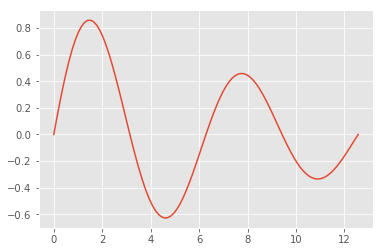

In [56]:
plt.plot(t, np.exp(-0.1*t)*np.sin(t))

En general, siempre se debería intentar utilizar las ufuncs en lugar de ciclos for. Esta clase de cálculos basados en arreglos se conocen como *vectorizados*.

## Procesamiento básico de datos

In [57]:
edades = np.array([23, 56, 67, 89, 23, 56, 27, 12, 8, 72])
generos = np.array(['m', 'm', 'f', 'f', 'm', 'f', 'm', 'm', 'm', 'f'])

Numpy tiene un conjunto básico de métodos y funciones para calcular cantidades básicas sobre ciertos datos.

In [58]:
edades.min(), edades.max()

(8, 89)

Calcular la media:

In [59]:
edades.mean()

43.30

Calcular la varianza y la desviación estandar:

In [60]:
edades.var(), edades.std()

(711.21, 26.67)

La función `bincount` cuenta cuantas veces ocurre cada valor en un arreglo:

In [61]:
np.bincount(edades)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

Los métodos `cumsum` y `cumprod` calculan las sumas y productos acumulados:

In [62]:
edades.cumsum()

array([ 23,  79, 146, 235, 258, 314, 341, 353, 361, 433])

In [63]:
edades.cumprod()

array([              23,             1288,            86296,
                7680344,        176647912,       9892283072,
           267091642944,    3205099715328,   25640797722624,
       1846137436028928])

La mayoría de las funciones y métodos anteriores toman un argumento llamado `axis` que aplica la operación a lo largo de un eje particular:

In [64]:
a = np.random.randint(0, 10, (3,4))
a

array([[0, 6, 0, 6],
       [3, 3, 8, 8],
       [8, 2, 3, 2]])

Con `axis=0`, la operación toma lugar a lo largo de las filas:

In [65]:
a.sum(axis=0)

array([11, 11, 11, 16])

Con `axis=1` la operación toma lugar a lo largo de las columnas:

In [66]:
a.sum(axis=1)

array([12, 22, 15])

La función `unique` es muy útil para trabajar con datos categóricos:

In [67]:
np.unique(generos)

array(['f', 'm'], 
      dtype='<U1')

In [68]:
np.unique(generos, return_counts=True)

(array(['f', 'm'], 
       dtype='<U1'), array([4, 6]))

La función `where` permite aplicar lógica condicional a los arreglos. Este es un esquema de cómo funciona:

```python
np.where(condicion, si_falsa, si_verdadera)
```

In [69]:
np.where(edades > 30, 0, 1)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

Los valores `si_falsa` y `si_verdadera` pueden ser arreglos:

In [70]:
np.where(edades < 30, 0, edades)

array([ 0, 56, 67, 89,  0, 56,  0,  0,  0, 72])

## Lectura y escritura de archivos

NumPy tiene varias funciones para leer y escribir arreglos de y hacia el sistema operativo.

In [71]:
a = np.random.rand(10)
a

array([ 0.29,  0.43,  0.76,  0.4 ,  0.9 ,  0.64,  0.89,  0.68,  0.45,  0.98])

Save the array to a binary file named `array1.npy`:

In [72]:
np.savetxt('array.txt', a)

Load the array back into memory:

In [73]:
a_copy = np.loadtxt('array.txt')

In [74]:
a_copy

array([ 0.29,  0.43,  0.76,  0.4 ,  0.9 ,  0.64,  0.89,  0.68,  0.45,  0.98])

## Algebra lineal

NumPy tambien puede hacer operaciones de algebra lineal

In [84]:
a = np.random.rand(5,5)
b = np.random.rand(5,5)

Para hacer una multiplicacion de matrices sobre los arreglos `a` y `b`, se usa la funcion `np.dot`.

In [86]:
np.dot(a, b)

array([[ 1.46,  1.45,  1.06,  1.13,  0.88],
       [ 1.8 ,  1.39,  0.8 ,  0.46,  0.5 ],
       [ 0.89,  1.19,  1.1 ,  1.23,  0.87],
       [ 0.5 ,  0.71,  0.95,  1.11,  0.86],
       [ 1.06,  1.22,  0.67,  0.76,  0.49]])

El paquete `np.linalg` tiene muchas operaciones de algebra lineal.

Determinante:

In [89]:
np.linalg.det(a)

-0.03

Inversion de matrices:

In [90]:
np.linalg.inv(a)

array([[ 4.58, -2.02,  0.33, -3.12, -0.91],
       [-0.93,  0.62,  2.42, -1.68, -0.28],
       [-0.78,  1.34, -1.99,  2.28,  0.31],
       [ 0.36, -0.18,  0.47,  0.62, -0.85],
       [-4.46,  1.56, -2.62,  4.23,  4.01]])

Eigenvalores:

In [91]:
np.linalg.eigvals(a)

array([ 2.08,  0.62,  0.34,  0.18, -0.36])

----

**Nota Importante**: Los contenidos de esta lección son una reediсión de [Data Science for Everyone](https://github.com/ellisonbg/ds4e), por Brian Granger

----
